# Agent `EnvAgentThreeStep` for `StableBaselines3`

This agent:
is designed to operate in (x3) simulations
1. Hot cycle
2. Cold cycle
3. Sustain cycle

The agent can control the temperature and duration of each of the first (x2) cycles

The agent will have access to a few of the temperatures of the system to help it learn

The reward will be based upon:
* +fraction for the amount of time that the last node of the pan is in the acceptable range of temperatures to cook
* -fraction for the amount of time that the last node of the pan is burning pancakes
* 0 for the amount of time that the pan is too cold


In [1]:
import gym
from gym import Env
from gym.spaces import Discrete, Box, Dict, Tuple, MultiBinary, MultiDiscrete 
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy

from stable_baselines3.common.env_checker import check_env

import random
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

import GridSimulator
import StableBaselinesAgent3 as sb3

## Create an Environment

In [2]:
env = sb3.EnvAgentThreeStep()
check_env(env, warn=True)

# Test the Environment

Episode: 1
..Reward: 0.0


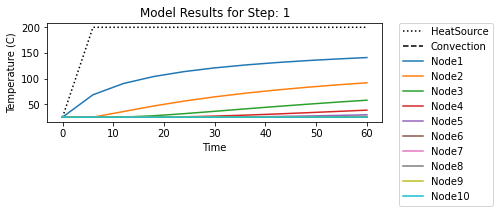

..Reward: 0.033


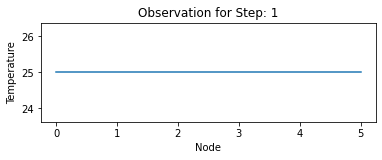

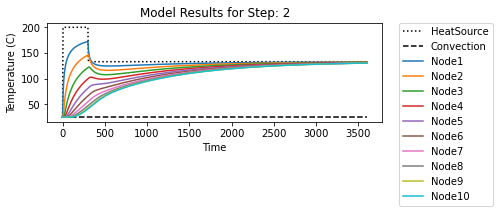

.Score: 0.033
Episode: 2
..Reward: 0.0


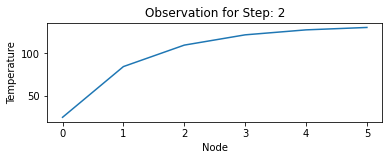

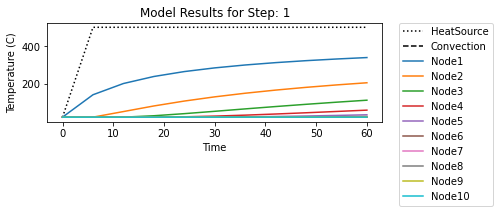

..Reward: 0.118


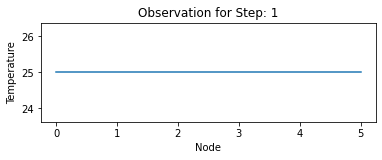

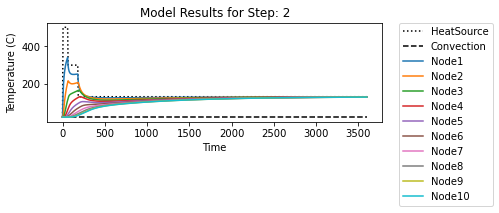

.Score: 0.118
Episode: 3
..Reward: 0.0


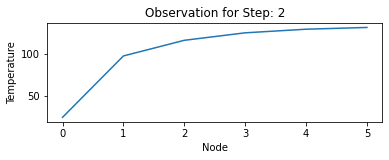

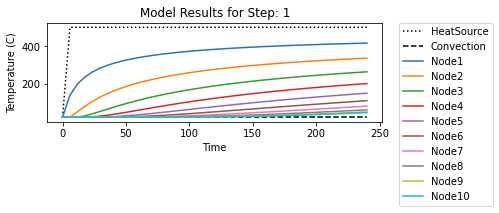

..Reward: -0.759


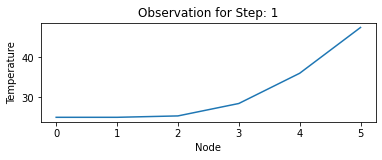

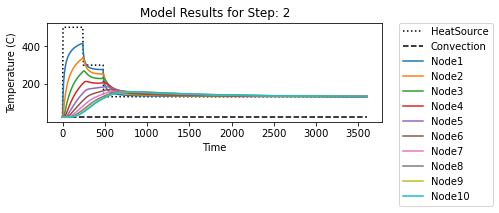

.Score: -0.759


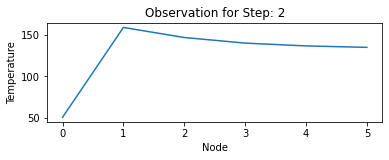

In [8]:
episodeMax = 3
for episode in range(1, episodeMax+1):
    print("Episode: " + str(episode))
    state = env.reset()
    done = False
    rewardTotal = 0
    while not done:
        action = env.action_space.sample()
        obs, reward, done, info = env.step(action)
        print("..Reward: " + str(np.round(reward, 3)))
        rewardTotal += reward

        Trial = env.objHeatSimulator.AllTemp
        plt.figure()
        plt.subplot(2, 1, 1)
        plt.plot(Trial.Time, Trial.Heater, ":k", label="HeatSource")
        plt.plot(Trial.Time, Trial.Convection, "--k", label="Convection")
        Node = 0
        while Node < env.objHeatSimulator.NumNodes:
                Node = Node + 1
                TrialValue = Node + 1
                LabelValue = "Node" + str(Node)
                plt.plot(Trial.Time, Trial.iloc[:,TrialValue], label=LabelValue)
        plt.xlabel("Time")
        plt.ylabel("Temperature (C)")
        plt.title("Model Results for Step: " + str(env.currentStep))
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
        plt.show()

        plt.subplot(2, 1, 2)
        plt.plot(obs)
        plt.xlabel("Node")
        plt.ylabel("Temperature")
        plt.title("Observation for Step: " + str(env.currentStep))
    print(".Score: " + str(np.round(rewardTotal, 3)))
env.close()

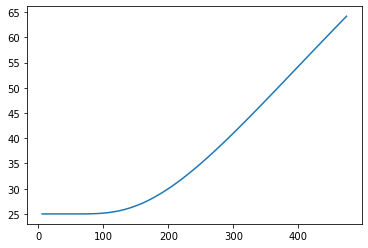

In [ ]:
t = info["timeCurrent"]
y = info["temperatureNode10"]
plt.figure()
plt.plot(t,y)

# Training

In [9]:
import time

tic = time.perf_counter()

log_path = os.path.join('Training', 'Logs')
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log=log_path)
model.learn(total_timesteps=100)

toc = time.perf_counter()
print("Elapsed time:  " + str(toc-tic) + " sec")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to Training\Logs\PPO_7
